# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

# Import Statements

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [2]:
df = pd.read_csv('/content/drive/MyDrive/1 Dev/2 Personal Projects /data_science_py/data_science_3/data/colors.csv')
df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [3]:
# Find the total number of unique colors
unique_colors_count = df['name'].nunique()
print(f'Total unique LEGO colors: {unique_colors_count}')

Total unique LEGO colors: 135


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [4]:
transparent_count_bool = df[df['is_trans'] == 't'].shape[0]  # Count where is_trans == 't'
opaque_count_bool = df[df['is_trans'] == 'f'].shape[0]      # Count where is_trans == 'f'

print(f'Transparent colors: {transparent_count_bool}')
print(f'Opaque colors: {opaque_count_bool}')

Transparent colors: 28
Opaque colors: 107


**Challenge**: Change this into an h3 section heading:

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image:

![3 Lego sets](https://i.imgur.com/aKcwkSx.png)


A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image

![Lego sets](https://i.imgur.com/whB1olq.png)

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows.

In [5]:
sets = pd.read_csv('/content/drive/MyDrive/1 Dev/2 Personal Projects /data_science_py/data_science_3/data/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [6]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [ ]:
first_release_year = sets['year'].min()

print(f'The first LEGO release year is: {first_release_year}')

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [12]:
# Get num_parts for the specific year
num_parts_for_year = sets[sets['year']== 1949]

# Display the results
print(num_parts_for_year)

      set_num                               name  year  theme_id  num_parts
9521  700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
9534  700.2-1               Large Gift Set (ABB)  1949       365        178
9539  700.3-1              Medium Gift Set (ABB)  1949       365        142
9544  700.A-1              Small Brick Set (ABB)  1949       371         24
9545  700.B-1  Small Doors and Windows Set (ABB)  1949       371         12


**Challenge**: Find the top 5 LEGO sets with the most number of parts.

In [13]:
# Get the top 5 LEGO sets with the most number of parts
top_5_sets = sets.nlargest(5, 'num_parts')
# Display the results
print(top_5_sets)

        set_num                           name  year  theme_id  num_parts
15004  BIGBOX-1  The Ultimate Battle for Chima  2015       571       9987
11183   75192-1          UCS Millennium Falcon  2017       171       7541
10551   71043-1                Hogwarts Castle  2018       246       6020
295     10256-1                      Taj Mahal  2017       673       5923
221     10189-1                      Taj Mahal  2008       673       5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [14]:
# Group by year and count the number of sets
sets_per_year = sets.groupby('year').count()['set_num']

# Display the number of sets released in 1955 and 2019
sets_1955 = sets_per_year.get(1955, 0)  # Default to 0 if the year is not present
sets_2019 = sets_per_year.get(2019, 0)  # Default to 0 if the year is not present

print(f"Number of LEGO sets released in 1955: {sets_1955}")
print(f"Number of LEGO sets released in 2019: {sets_2019}")

Number of LEGO sets released in 1955: 28
Number of LEGO sets released in 2019: 840


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.

In [16]:
import matplotlib.pyplot as plt

# Group by year and count the number of sets
sets_per_year = sets.groupby('year').count()['set_num']
# Split the data into years with complete info and the last two years
years_full_data = sets_per_year[:-2]  # All years except the last two
years_latest = sets_per_year[-2:]      # The last two years


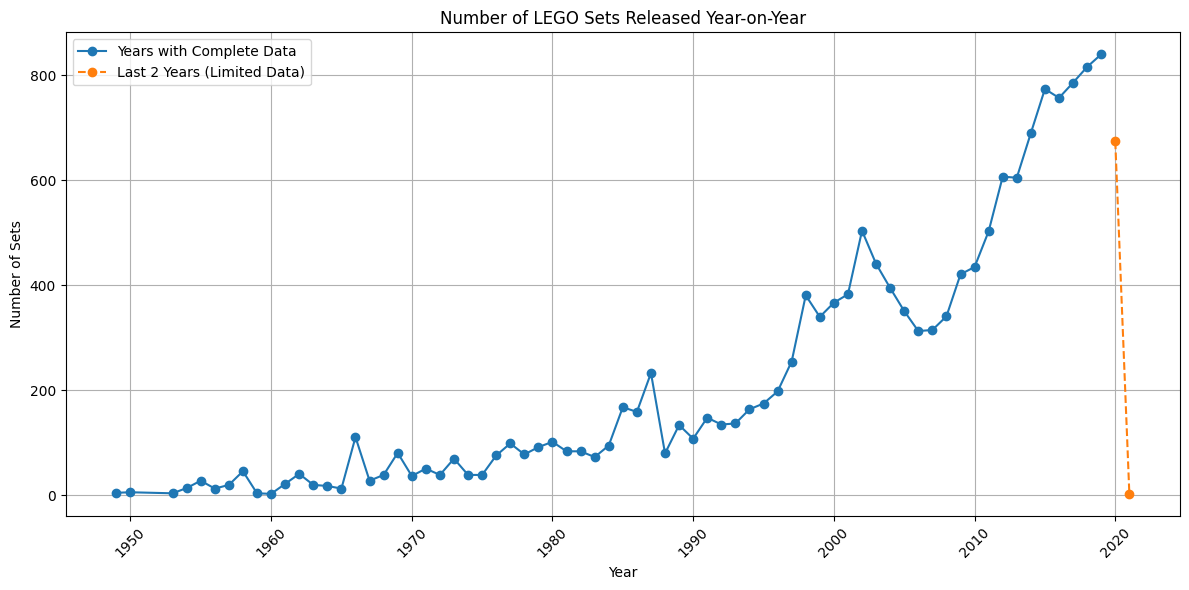

In [17]:
# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(years_full_data.index, years_full_data.values, marker='o', label='Years with Complete Data')
plt.plot(years_latest.index, years_latest.values, marker='o', linestyle='--', label='Last 2 Years (Limited Data)')

plt.title('Number of LEGO Sets Released Year-on-Year')
plt.xlabel('Year')
plt.ylabel('Number of Sets')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Adjusts the plot to fit nicely
plt.show()

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [18]:
# Group by year and aggregate to count unique theme_ids
unique_themes_per_year = sets.groupby('year').agg({'theme_id': 'nunique'})

In [19]:
# Rename the column for clarity
unique_themes_per_year.rename(columns={'theme_id': 'unique_theme_count'}, inplace=True)
# Display the results
print(unique_themes_per_year)

      unique_theme_count
year                    
1949                   2
1950                   1
1953                   2
1954                   2
1955                   4
...                  ...
2017                  89
2018                  93
2019                  78
2020                  82
2021                   1

[71 rows x 1 columns]


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

### Line Charts with Two Seperate Axes

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart?

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

### Merging (i.e., Combining) DataFrames based on a Key
